In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
df = pd.read_csv('/content/wine_data.csv',header=None , usecols=[0,1,2])
df.columns = ['Class label','Alcohol','Malic acid']

In [197]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

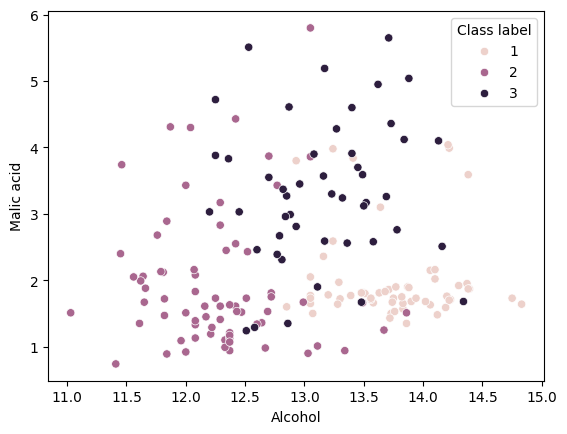

In [198]:
sns.scatterplot(x='Alcohol',y='Malic acid',hue='Class label',data=df)


<Axes: xlabel='Alcohol', ylabel='Density'>

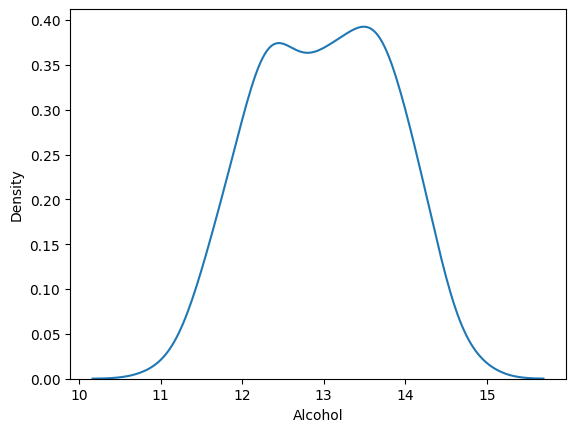

In [199]:
sns.kdeplot(x='Alcohol',data=df)

<Axes: xlabel='Malic acid', ylabel='Density'>

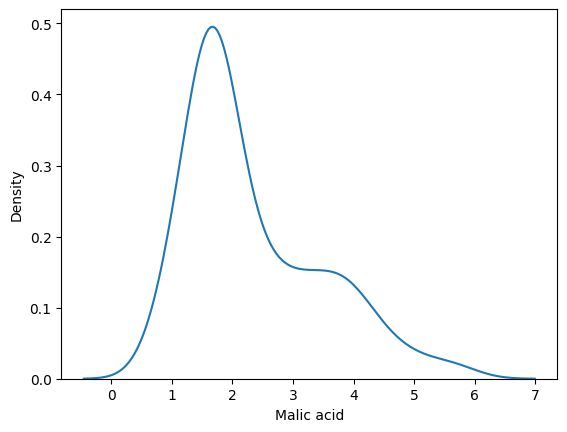

In [200]:
sns.kdeplot(x="Malic acid", data = df)

In [201]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train, Y_test = train_test_split(df.drop('Class label', axis=1), df['Class label'] , test_size=0.3 , random_state=0)

In [202]:
X_train.shape , X_test.shape

((124, 2), (54, 2))

In [203]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [204]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns= X_test.columns)

In [205]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [206]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


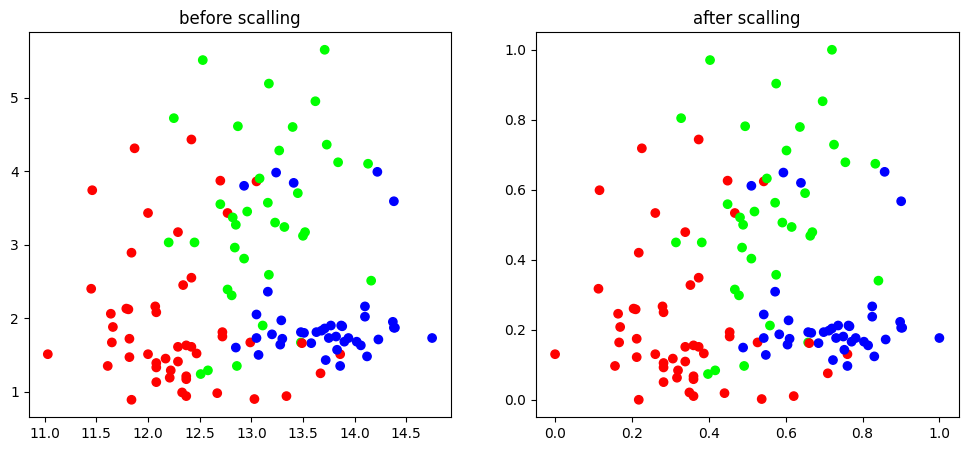

In [207]:
 fig , (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(12,5))

 ax1.scatter(X_train['Alcohol'] , X_train['Malic acid'], c=Y_train , cmap='brg')
 ax1.set_title('before scalling')

 ax2.scatter(X_train_scaled['Alcohol'] , X_train_scaled['Malic acid'], c=Y_train
             , cmap='brg')
 ax2.set_title('after scalling')

plt.show()

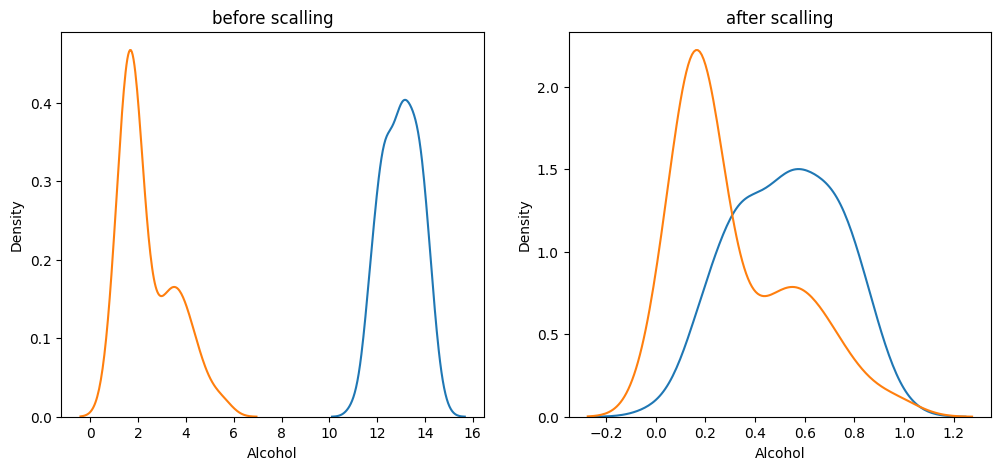

In [208]:
fig , (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(12,5))

ax1.set_title('before scalling')
sns.kdeplot(X_train['Alcohol'] ,ax = ax1)
sns.kdeplot(X_train['Malic acid'] ,ax = ax1)

ax2.set_title('after scalling')
sns.kdeplot(X_train_scaled['Alcohol'] ,ax = ax2)
sns.kdeplot(X_train_scaled['Malic acid'] ,ax = ax2)

plt.show()

# Task
Train and evaluate a Logistic Regression model on the wine dataset using both non-scaled and scaled features, then compare their accuracy scores to understand the impact of scaling.

## Import Libraries

### Subtask:
Import necessary libraries for model building (e.g., Logistic Regression) and evaluation (e.g., accuracy_score).


**Reasoning**:
The subtask requires importing `LogisticRegression` and `accuracy_score` for model building and evaluation. I will use a code block to import these.



In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Train Model (Non-Scaled)

### Subtask:
Train a Logistic Regression model using the non-scaled training data (X_train, Y_train) and evaluate its performance on the non-scaled test data (X_test, Y_test).


**Reasoning**:
I need to train a Logistic Regression model using the non-scaled data, make predictions on the test set, and calculate its accuracy. I will use the previously imported `LogisticRegression` and `accuracy_score` functions.



In [210]:
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred_non_scaled = model.predict(X_test)
accuracy_non_scaled = accuracy_score(Y_test, y_pred_non_scaled)
print(f"Accuracy of Logistic Regression on non-scaled data: {accuracy_non_scaled:.4f}")

Accuracy of Logistic Regression on non-scaled data: 0.7593


## Train Model (Scaled)

### Subtask:
Train a Logistic Regression model using the scaled training data (X_train_scaled, Y_train) and evaluate its performance on the scaled test data (X_test_scaled, Y_test).

**Reasoning**:
I need to train a Logistic Regression model using the scaled data, make predictions on the scaled test set, and calculate its accuracy. I will use the previously imported `LogisticRegression` and `accuracy_score` functions.



In [211]:
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, Y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(Y_test, y_pred_scaled)
print(f"Accuracy of Logistic Regression on scaled data: {accuracy_scaled:.4f}")

Accuracy of Logistic Regression on scaled data: 0.7963


## Compare Accuracy Scores

### Subtask:
Compare the accuracy scores of the Logistic Regression models trained on non-scaled and scaled data to understand the impact of feature scaling.

**Reasoning**:
I have already calculated `accuracy_non_scaled` and `accuracy_scaled`. I will now display these values side-by-side or in a comparative statement to clearly show the impact of scaling on the model's performance.

**Reasoning**:
To compare the accuracy scores, I will print both the `accuracy_non_scaled` and `accuracy_scaled` values, which have already been computed.



In [212]:
print(f"Accuracy of Logistic Regression on non-scaled data: {accuracy_non_scaled:.4f}")
print(f"Accuracy of Logistic Regression on scaled data: {accuracy_scaled:.4f}")

Accuracy of Logistic Regression on non-scaled data: 0.7593
Accuracy of Logistic Regression on scaled data: 0.7963


## Compare Performance

### Subtask:
Print and compare the accuracy scores of the models trained on non-scaled and scaled data.


## Summary:

### Q&A
The impact of scaling on the Logistic Regression model's performance was positive.

### Data Analysis Key Findings
*   The Logistic Regression model trained on non-scaled data achieved an accuracy of 0.7593.
*   The Logistic Regression model trained on scaled data achieved a higher accuracy of 0.7963.
*   Feature scaling improved the model's accuracy by approximately 3.7 percentage points (from 0.7593 to 0.7963).

### Insights or Next Steps
*   Feature scaling significantly improves the performance of Logistic Regression models on this dataset, highlighting its importance in preprocessing.
*   Further investigation could involve comparing other scaling techniques or evaluating the model with scaled features using different metrics (e.g., precision, recall, F1-score) to get a more comprehensive understanding of its performance.
